In [20]:
import pandas as pd
import numpy as np
import pymysql as mysql
import matplotlib.pyplot as plt
import seaborn as sea
import cred
pd.options.display.max_colwidth = 1000
%matplotlib inline

In [21]:
print(cred.user_name)

root


In [2]:
host = cred.host_name
user = cred.user_name
passwd = cred.passwd
db = cr

In [3]:
conn = mysql.connect(host=host, user=user, passwd=passwd, db=db)
cur = conn.cursor()

In [4]:
# tables stored in database data_science
cur.execute("SHOW TABLES")
cur.fetchall()

(('badges',), ('posts',), ('tags',), ('users',))

In [8]:
tags_query = "SELECT * FROM tags"

In [9]:
tags = pd.read_sql(tags_query, conn)

In [11]:
tags.tail(5)

,Id,TagName,Count,ExcerptPostId,WikiPostId
295,458,caffe,1,NaN,NaN
296,459,redshift,1,NaN,NaN
297,460,null,1,NaN,NaN
298,461,text-filter,1,NaN,NaN
299,462,software-stack,1,NaN,NaN


In [24]:
tags_sorted = tags[['TagName', 'Count']].sort_values(by="Count", ascending=False)

In [25]:
tags_sorted.shape

(300, 2)

In [26]:
top_10 = tags_sorted.head(10)

In [27]:
top_10

,TagName,Count
1,machine-learning,1331
32,python,537
18,r,460
53,classification,435
56,neuralnetwork,425
3,data-mining,396
11,clustering,269
101,predictive-modeling,253
42,dataset,226
2,bigdata,224


sea.set(color_codes=True)
sea.set_style('ticks')
sea.stripplot(x='TagName', y='Count', data=top_10, jitter=True, alpha=0.75, size=10)
sea.despine(offset=20, trim=True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

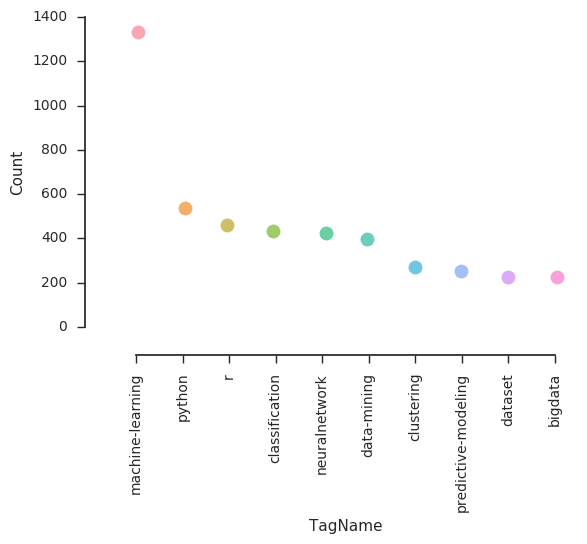

In [28]:
sea.set(color_codes=True)
sea.set_style('ticks')
sea.stripplot(x='TagName', y='Count', data=top_10, jitter=True, alpha=0.75, size=10)
sea.despine(offset=20, trim=True)
plt.xticks(rotation=90)

In [119]:
posts_query = "SELECT Id, Body,OwnerUserId, PostTypeId, Score,\
ViewCount, Title,Tags, AnswerCount, CommentCount FROM posts"
posts = pd.read_sql(posts_query, con=conn)

In [120]:
#posts_query = "SELECT * FROM posts"
#posts = pd.read_sql(posts_query, con=conn)
#posts.head(5)
posts.columns

Index(['Id', 'Body', 'OwnerUserId', 'PostTypeId', 'Score', 'ViewCount',
       'Title', 'Tags', 'AnswerCount', 'CommentCount'],
      dtype='object')

In [121]:
posts_sorted_score = posts.sort_values(by='Score', ascending=False)
posts_sorted_viewcount = posts.sort_values(by='ViewCount', ascending=False)
posts_sorted_answercount = posts.sort_values(by='AnswerCount', ascending=False)
posts_sorted_commentcount = posts.sort_values(by='CommentCount', ascending=False)

In [122]:
i = 4
print('Id: ', posts_sorted_score.iloc[i].Id)
print('Title: ', posts_sorted_score.iloc[i].Title)
print('Tag: ', posts_sorted_score.iloc[i].Tags)
print('Score: ', posts_sorted_score.iloc[i].Score)
print('AnswerCount:', posts_sorted_score.iloc[i].AnswerCount)
print('Body: ', posts_sorted_score.iloc[i].Body)

Id:  19
Title:  How big is big data?
Tag:  <bigdata><scalability><efficiency><performance>
Score:  53
AnswerCount: 12.0
Body:  <p>Lots of people use the term <em>big data</em> in a rather <em>commercial</em> way, as a means of indicating that large datasets are involved in the computation, and therefore potential solutions must have good performance. Of course, <em>big data</em> always carry associated terms, like scalability and efficiency, but what exactly defines a problem as a <em>big data</em> problem?</p>&#xA;&#xA;<p>Does the computation have to be related to some set of specific purposes, like data mining/information retrieval, or could an algorithm for general graph problems be labeled <em>big data</em> if the dataset was <em>big enough</em>? Also, how <em>big</em> is <em>big enough</em> (if this is possible to define)?</p>&#xA;


In [123]:
i = 4
print('Id: ', posts_sorted_answercount.iloc[i].Id)
print('Title: ', posts_sorted_answercount.iloc[i].Title)
print('Tag: ', posts_sorted_answercount.iloc[i].Tags)
print('Score: ', posts_sorted_answercount.iloc[i].Score)
print('AnswerCount:', posts_sorted_answercount.iloc[i].AnswerCount)
print('Body: ', posts_sorted_answercount.iloc[i].Body)

Id:  5357
Title:  Data Science in C (or C++)
Tag:  <machine-learning><bigdata><statistics><programming><c>
Score:  22
AnswerCount: 11.0
Body:  <p>I'm an <code>R</code> language programmer. I'm also in the group of people who are considered Data Scientists but who come from academic disciplines other than CS.</p>&#xA;&#xA;<p>This works out well in my role as a Data Scientist, however, by starting my career in <code>R</code> and only having basic knowledge of other scripting/web languages, I've felt somewhat inadequate in 2 key areas:</p>&#xA;&#xA;<ol>&#xA;<li>Lack of a solid knowledge of programming theory.</li>&#xA;<li>Lack of a competitive level of skill in faster and more widely used languages like <code>C</code>, <code>C++</code> and <code>Java</code>, which could be utilized to increase the speed of the pipeline and Big Data computations as well as to create DS/data products which can be more readily developed into fast back-end scripts or standalone applications.</li>&#xA;</ol>&#x

In [124]:
i = 7
print('Id: ', posts_sorted_viewcount.iloc[i].Id)
print('Title: ', posts_sorted_viewcount.iloc[i].Title)
print('Tag: ', posts_sorted_viewcount.iloc[i].Tags)
print('Score: ', posts_sorted_viewcount.iloc[i].Score)
print('AnswerCount:', posts_sorted_viewcount.iloc[i].AnswerCount)
print('Body: ', posts_sorted_viewcount.iloc[i].Body)

Id:  5345
Title:  IDE alternatives for R programming (RStudio, IntelliJ IDEA, Eclipse, Visual Studio)
Tag:  <r><tools><rstudio><programming>
Score:  11
AnswerCount: 7.0
Body:  <p>I use RStudio for R programming. I remember about solid IDE-s from other technology stacks, like Visual Studio or Eclipse.</p>&#xA;&#xA;<p>I have two questions:</p>&#xA;&#xA;<ol>&#xA;<li>What other IDE-s than RStudio are used (please consider providing some brief description on them).</li>&#xA;<li>Does any of them have noticeable advantages over RStudio?</li>&#xA;</ol>&#xA;&#xA;<p>I mostly mean debug/build/deploy features, besides coding itself (so text editors are probably not a solution).</p>&#xA;


In [125]:
i = 0
print('Id: ', posts_sorted_commentcount.iloc[i].Id)
print('Title: ', posts_sorted_commentcount.iloc[i].Title)
print('Tag: ', posts_sorted_commentcount.iloc[i].Tags)
print('Score: ', posts_sorted_commentcount.iloc[i].Score)
print('AnswerCount:', posts_sorted_commentcount.iloc[i].AnswerCount)
print('CommentCount:', posts_sorted_commentcount.iloc[i].CommentCount)
print('Body: ', posts_sorted_commentcount.iloc[i].Body)

Id:  12186
Title:  Fitting lines through large point clouds
Tag:  <machine-learning><clustering><regression>
Score:  9
AnswerCount: 2.0
CommentCount: 19
Body:  <p>I have a large set of points (order of 10k points) formed by particle tracks (movement in the xy plane in time filmed by a camera, so 3d - 256x256px and ca 3k frames in my example set) and noise. These particles travel on approximately straight lines roughly (but only roughly) in the same direction, and so for the analysis of their trajectories I am trying to fit lines through the points. I tried to use Sequential RANSAC, but can't find a criterion to reliably single out false positives, as well as T- and J-Linkage, which were too slow and also not reliable enough.</p>&#xA;&#xA;<p>Here is an image of a part of the dataset with good and bad fits I got with sequential Ransac: <a href="http://i.stack.imgur.com/8ua2o.png" rel="nofollow"><img src="http://i.stack.imgur.com/8ua2o.png" alt="enter image description here"></a>&#xA;I'm 

In [130]:
print(posts.columns)
print(badges.columns)

Index(['Id', 'Body', 'OwnerUserId', 'PostTypeId', 'Score', 'ViewCount',
       'Title', 'Tags', 'AnswerCount', 'CommentCount'],
      dtype='object')
Index(['Id', 'UserId', 'Date', 'Name', 'Class', 'TagBased'], dtype='object')


In [133]:
print(posts.loc[posts['OwnerUserId'] == 9])

    Id                                               Body  OwnerUserId  \
24  37  <p>To me (coming from a relational database ba...          9.0   
76  95  <p>Is it valid to <em>use</em> click frequency...          9.0   

    PostTypeId  Score  ViewCount Title  Tags  AnswerCount  CommentCount  
24           2     63        NaN  None  None          NaN             4  
76           2      4        NaN  None  None          NaN             0  


In [127]:
#common = pd.merge(top_10_comments, top_10_score, how='inner')

In [128]:
badges_query = "SELECT * FROM badges"
badges = pd.read_sql(badges_query, con=conn)

In [104]:
print(badges.shape)
print(badges.head(5))

(20092, 6)
   Id  UserId                Date            Name  Class  TagBased
0   1       1 2014-05-13 23:06:45        Informed      3         0
1   2       2 2014-05-13 23:11:04  Autobiographer      3         0
2   3       4 2014-05-13 23:20:54  Autobiographer      3         0
3   4       5 2014-05-13 23:20:54  Autobiographer      3         0
4   5       8 2014-05-13 23:20:54  Autobiographer      3         0


In [106]:
print(posts.columns)
print(badges.columns)

Index(['Id', 'Body', 'Score', 'ViewCount', 'Title', 'Tags', 'AnswerCount',
       'CommentCount'],
      dtype='object')
Index(['Id', 'UserId', 'Date', 'Name', 'Class', 'TagBased'], dtype='object')


In [142]:
users_query = "SELECT Id, DisplayName, Reputation,CreationDate, Location, AboutMe, Views, UpVotes, DownVotes, AccountId FROM users"
users = pd.read_sql(users_query, con=conn)

In [143]:
print(users.shape)
users_sorted_views = users.sort_values(by='Views', ascending=False)
users_sorted_upvotes = users.sort_values(by='UpVotes', ascending=False)
users_sorted_downvotes = users.sort_values(by='DownVotes', ascending=False)
users_sorted_reputation = users.sort_values(by='Reputation', ascending=False)

(19237, 10)


In [174]:
print(badges.Name.unique())
print(len(badges.Name.unique()))

['Informed' 'Autobiographer' 'Student' 'Supporter' 'Editor' 'Teacher'
 'Citizen Patrol' 'Precognitive' 'Quorum' 'Talkative' 'Critic' 'Custodian'
 'Scholar' 'Nice Answer' 'Nice Question' 'Organizer' 'Peer Pressure'
 'Suffrage' 'Mortarboard' 'Cleanup' 'Disciplined' 'Enlightened'
 'Commentator' 'Tag Editor' 'Vox Populi' 'Promoter' 'Tumbleweed' 'Beta'
 'Popular Question' 'Self-Learner' 'Enthusiast' 'Good Answer' 'Curious'
 'Taxonomist' 'Convention' 'Announcer' 'Favorite Question' 'Good Question'
 'Revival' 'Notable Question' 'Benefactor' 'Explainer' 'Civic Duty'
 'Reviewer' 'Necromancer' 'Excavator' 'Tenacious' 'Fanatic' 'Yearling'
 'Proofreader' 'Guru' 'Constable' 'Synonymizer' 'Famous Question'
 'machine-learning' 'Steward' 'Booster' 'Strunk & White' 'Publicist'
 'Electorate' 'Deputy' 'Investor' 'Stellar Question' 'Inquisitive'
 'clustering' 'neuralnetwork' 'Altruist']
67


In [298]:
# used => 
# (Scholar,3) (Citizen Patrol, 3) (Critic, 3), (Organizer, 2) (Nice Question, )
# (Nice Answer, 2) (Enlightened, 2) (Commentator, 2) (Enthusiast, 2) (Popular Question, 3)
# (Announcer, 3), (Revival, 3) (Notable Question, 3), (Yearling, 3) (Stellar Question, 1)
badges_sub = badges.loc[badges['Name'] == 'Stellar Question']
complete_info = pd.merge(badges_sub, users, left_on= 'UserId', right_on='Id')
location = complete_info.Location.value_counts()
location = location[location>=1]
print(location)
print(complete_info)

Tehran, Iran    1
Name: Location, dtype: int64
    Id_x  UserId                Date              Name  Class  TagBased  Id_y  \
0  20868     227 2016-07-10 04:52:21  Stellar Question      1         0   227   

       DisplayName  Reputation        CreationDate      Location  \
0  Amir Ali Akbari         740 2014-05-18 11:29:56  Tehran, Iran   

                                                                                       AboutMe  \
0  <p>A graduate student of Sharif University of Technology, working in Arsh company.</p>&#xA;   

   Views  UpVotes  DownVotes  AccountId  
0     15      163          2   210958.0  


users.columns

In [303]:
j = 227
print(j in posts.OwnerUserId)
print(j in posts.Id)

True
True


In [277]:
posts.columns

Index(['Id', 'Body', 'OwnerUserId', 'PostTypeId', 'Score', 'ViewCount',
       'Title', 'Tags', 'AnswerCount', 'CommentCount'],
      dtype='object')

In [310]:
print(posts.loc[posts['OwnerUserId']==j])

      Id  \
108  134   
109  135   
110  136   
111  137   
128  155   
196  223   
358  407   

                                                                                                                                                                                                        Body  \
108  <p>In our company, we have a MongoDB database containing a lot of unstructured data, on which we need to run map-reduce algorithms to generate reports and other analyses. We have two approaches to...   
109  <p>Considering another criteria, I think that in some cases using Python may be much superior to R for Big Data. I know the wide-spread use of R in data science educational materials and the good ...   
110  <p>MapReduce is a framework for processing parallelizable problems across huge datasets using a large number of computers (nodes), collectively referred to as a cluster (if all nodes are on the sa...   
111                                                                    